# Importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)


# Análise Exploratória dos Dados

In [2]:
dataset = pd.read_csv("insurance.csv")

## Exibindo informações relacionadas ao dataset.

In [3]:
print(dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print(dataset.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [5]:
print(dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print(dataset.shape)

(1338, 7)


In [7]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Podemos verificar através dos dados dispostos acima que o dataset possui 1338 linhas e 7 colunas, sendo as colunas referentes aos dados de idade, IMC, número de filhos, informação se a pessoa é fumante ou não, a região do país (Estados Unidos da América) em que se encontra e por fim o valor cobrado pelo seguro, baseado nos dados anteriormente citados. Podemos notar que o dataset é bem diverso, possuindo dados de pessoas de 18 à 64 anos. O dataset não possui dados em falta, dessa forma podemos prosseguir na análise

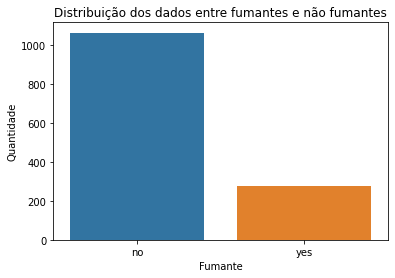

In [8]:
sns.countplot(x = 'smoker', data = dataset,
              order = dataset['smoker'].value_counts(ascending=False)[0:20].index)
plt.title('Distribuição dos dados entre fumantes e não fumantes')
plt.xlabel('Fumante')
plt.ylabel('Quantidade')
plt.show()


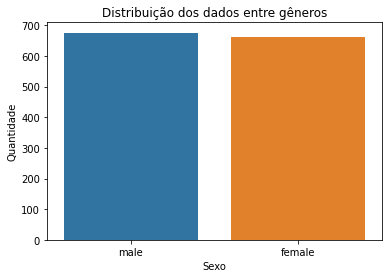

In [9]:
sns.countplot(x = 'sex', data = dataset,
              order = dataset['sex'].value_counts(ascending=False)[0:20].index)
plt.title('Distribuição dos dados entre gêneros')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

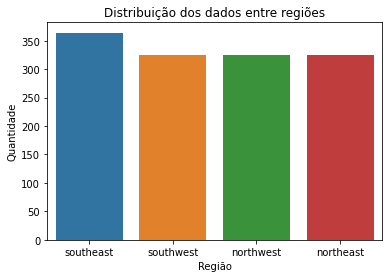

In [10]:
sns.countplot(x = 'region',
              data = dataset,
              order = dataset['region'].value_counts(ascending=False)[0:20].index)
plt.title('Distribuição dos dados entre regiões')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.show()

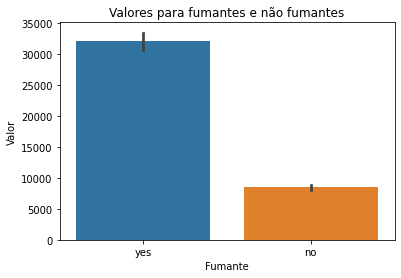

In [11]:
sns.barplot(x='smoker', y='charges', data=dataset)
plt.title('Valores para fumantes e não fumantes')
plt.xlabel('Fumante')
plt.ylabel('Valor')
plt.show()

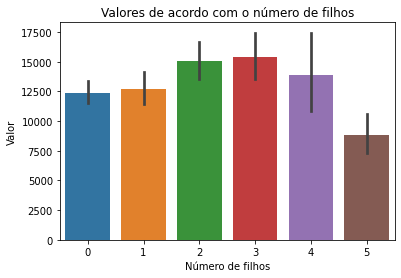

In [12]:
sns.barplot(x='children', y='charges', data=dataset)
plt.title('Valores de acordo com o número de filhos')
plt.xlabel('Número de filhos')
plt.ylabel('Valor')
plt.show()

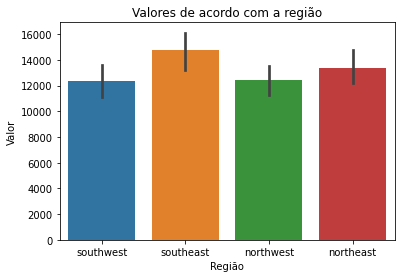

In [13]:
sns.barplot(x='region', y='charges', data=dataset)
plt.title('Valores de acordo com a região')
plt.xlabel('Região')
plt.ylabel('Valor')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['sex','smoker', 'region']
le = LabelEncoder()
df = dataset
df[cat_col] = df[cat_col].apply(lambda col: le.fit_transform(col.astype(str)))

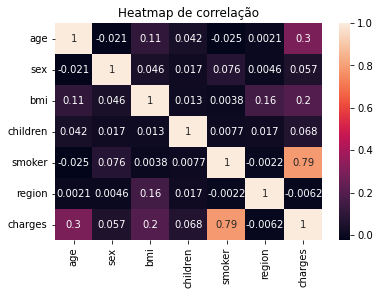

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap de correlação')
plt.show()

# Regressão Linear

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

s = StandardScaler()
X = dataset.drop(['charges', 'region', 'sex', 'children'], axis=1)
y = dataset.charges

# Add polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=0)

# Scale features
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

# PCA
pca = PCA(.95)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

# Linear Regression
lr = LinearRegression().fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2=r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_pca.shape[1]-1)

print(rmse)
print(r2)
print(adj_r2)


5417.5
0.8155642026419513
0.8134683413083371


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Máquinas de Vetores de Suporte

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

X = dataset.drop(['charges', 'region', 'sex', 'children'], axis=1)
y = dataset.charges

# Add polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
X_train = pd.DataFrame(X_train, columns = X_pf.columns)
X_test = pd.DataFrame(X_test, columns = X_pf.columns)

# Scale features
X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)

# Tuning Params
grid = {'kernel':['linear','rbf','poly','sigmoid'],
        'C': np.logspace(-3, 3, 10),
        'gamma':np.logspace(-3, 3, 10)}
svm = SVR()
svm_cv=RandomizedSearchCV(estimator=svm, param_distributions=grid, scoring='neg_mean_squared_error', 
                          n_iter=10, cv=3, random_state=21, n_jobs=-1)
svm_cv.fit(X_train, y_train)
y_pred=svm_cv.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2=r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(rmse)
print(r2)
print(adj_r2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4719.68
0.8507821561274163
0.845576882503954


# KNN 

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X = dataset.drop(['charges', 'region', 'sex', 'children'], axis=1)
y = dataset.charges

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names(X.columns))

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=1)
X_train = pd.DataFrame(X_train, columns = X_pf.columns)
X_test = pd.DataFrame(X_test, columns = X_pf.columns)

X_train = pd.DataFrame(data=s.fit_transform(X_train), columns=X_pf.columns)
X_test = pd.DataFrame(data=s.transform(X_test), columns=X_pf.columns)

# KNN
grid = {'n_neighbors': range(2, 20),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [int(x) for x in np.linspace(10, 50, num = 5)],
        'p': [1, 2]}
knn=KNeighborsRegressor()
knn_cv=RandomizedSearchCV(estimator=knn, param_distributions=grid, scoring='neg_mean_squared_error', 
                          n_iter=100, cv=3, random_state=21, n_jobs=-1)
knn_cv.fit(X_train, y_train)
y_pred=knn_cv.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2=r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(rmse)
print(r2)
print(adj_r2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4568.15
0.8602093397063835
0.855332921324048
